# Stable Diffusion WebUI

In [1]:
import sys
argv = sys.argv
argv0 = [argv[0], '--api', '--listen', '--disable-console-progressbars', '--xformers']
print(argv0)
sys.argv = argv0

sys.path.append('/home/akirchme/stable-diffusion-webui')

from modules import shared, scripts
from webui import api_only
api_only()

['/home/akirchme/.conda/envs/diff2/lib/python3.10/site-packages/ipykernel_launcher.py', '--api', '--listen', '--disable-console-progressbars', '--xformers']


2023-02-07 18:21:52.985406: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-07 18:21:54.136493: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/akirchme/.conda/envs/diff2/lib/python3.10/site-packages/cv2/../../lib64:
2023-02-07 18:21:54.136593: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/akirchme/.conda/envs/diff2/lib/python3.10/sit

SD-Webui API layer loaded
Loading weights [88ecb78256] from /home/akirchme/stable-diffusion-webui/models/Stable-diffusion/v2-1.ckpt
Creating model from config: /home/akirchme/stable-diffusion-webui/models/Stable-diffusion/v2-1.yaml
LatentDiffusion: Running in eps-prediction mode
DiffusionWrapper has 865.91 M params.
Applying xformers cross attention optimization.
Textual inversion embeddings loaded(2): TOKENALB, ALB1
Model loaded in 2.8s (load weights from disk: 1.2s, create model: 0.1s, apply weights to model: 0.4s, apply half(): 0.2s, load VAE: 0.5s, move model to device: 0.3s).


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ /tmp/ipykernel_51897/2635351627.py:11 in <module>                                                │
│                                                                                                  │
│ [Errno 2] No such file or directory: '/tmp/ipykernel_51897/2635351627.py'                        │
│                                                                                                  │
│ /home/akirchme/stable-diffusion-webui/webui.py:192 in api_only                                   │
│                                                                                                  │
│   189 │                                                                                          │
│   190 │   modules.script_callbacks.app_started_callback(None, app)                               │
│   191 │                                                                                          │
│ ❱ 192 │   api.launch(server_name="0.0.0.0" if cmd_opts.listen else "127.0.0.1", port=cmd_opts.   │
│   193                                                                                            │
│   194                                                                                            │
│   195 def webui():                                                                               │
│                                                                                                  │
│ /home/akirchme/stable-diffusion-webui/modules/api/api.py:551 in launch                           │
│                                                                                                  │
│   548 │                                                                                          │
│   549 │   def launch(self, server_name, port):                                                   │
│   550 │   │   self.app.include_router(self.router)                                               │
│ ❱ 551 │   │   uvicorn.run(self.app, host=server_name, port=port)                                 │
│   552                                                                                            │
│                                                                                                  │
│ /home/akirchme/.conda/envs/diff2/lib/python3.10/site-packages/uvicorn/main.py:569 in run         │
│                                                                                                  │
│   566 │   │   sock = config.bind_socket()                                                        │
│   567 │   │   Multiprocess(config, target=server.run, sockets=[sock]).run()                      │
│   568 │   else:                                                                                  │
│ ❱ 569 │   │   server.run()                                                                       │
│   570 │   if config.uds and os.path.exists(config.uds):                                          │
│   571 │   │   os.remove(config.uds)  # pragma: py-win32                                          │
│   572                                                                                            │
│                                                                                                  │
│ /home/akirchme/.conda/envs/diff2/lib/python3.10/site-packages/uvicorn/server.py:60 in run        │
│                                                                                                  │
│    57 │                                                                                          │
│    58 │   def run(self, sockets: Optional[List[socket.socket]] = None) -> None:                  │
│    59 │   │   self.config.setup_event_loop()                                                     │
│ ❱  60 │   │   return asyncio.run(self.serve(sockets=sockets))                                    │
│    61 │                                                    

In [2]:
import modules.scripts
from modules import sd_samplers
from modules.generation_parameters_copypaste import create_override_settings_dict
from modules.processing import StableDiffusionProcessing, Processed, StableDiffusionProcessingTxt2Img, \
    StableDiffusionProcessingImg2Img, process_images
from modules.shared import opts, cmd_opts
import modules.shared as shared
import modules.processing as processing
from modules.ui import plaintext_to_html

    
class FakeTQDM:
    def update(self, *args):
        pass
    def clear(self, *args):
        pass
class FakeSink:
    def write(self, *args):
        pass
    def writelines(self, *args):
        pass
    def close(self, *args):
        pass
    
def txt2img(prompt = '', negative_prompt = '', steps = 100, cfg_scale=7, width=512, height=512, sampler_name='DPM++ SDE Karras', batch_size=1, seed = -1):
    prompt_styles = [] 
    subseed = -1.0
    subseed_strength = 0
    seed_resize_from_h = 0
    seed_resize_from_w = 0
    seed_enable_extras = False
    n_iter = 1
    restore_faces = False
    tiling = False
    enable_hr = False
    denoising_strength = None
    hr_scale = 2
    hr_upscaler = 'Latent'
    hr_second_pass_steps = 0
    hr_resize_x = 0
    hr_resize_y = 0
    override_settings = {}
    args = (0,)#(0, False, False, 'positive', 'comma', 0, False, False, '', 1, '', 0, '', 0, '', True, False, False, False, 0)

    p = StableDiffusionProcessingTxt2Img(
        sd_model=shared.sd_model,
        outpath_samples=opts.outdir_samples or opts.outdir_txt2img_samples,
        outpath_grids=opts.outdir_grids or opts.outdir_txt2img_grids,
        prompt=prompt,
        styles=prompt_styles,
        negative_prompt=negative_prompt,
        seed=seed,
        subseed=subseed,
        subseed_strength=subseed_strength,
        seed_resize_from_h=seed_resize_from_h,
        seed_resize_from_w=seed_resize_from_w,
        seed_enable_extras=seed_enable_extras,
        sampler_name=sampler_name,
        batch_size=batch_size,
        n_iter=n_iter,
        steps=steps,
        cfg_scale=cfg_scale,
        width=width,
        height=height,
        restore_faces=restore_faces,
        tiling=tiling,
        enable_hr=enable_hr,
        denoising_strength=denoising_strength if enable_hr else None,
        hr_scale=hr_scale,
        hr_upscaler=hr_upscaler,
        hr_second_pass_steps=hr_second_pass_steps,
        hr_resize_x=hr_resize_x,
        hr_resize_y=hr_resize_y,
        override_settings=override_settings,
    )

    p.scripts = modules.scripts.scripts_txt2img
    p.script_args = args

    #if cmd_opts.enable_console_prompts:
    #    print(f"\ntxt2img: {prompt}", file=shared.progress_print_out)
    
    shared.progress_print_out = FakeSink()
    shared.total_tqdm = FakeTQDM()
    processed = modules.scripts.scripts_txt2img.run(p, *args)
    if processed is None:
        processed = process_images(p)
    p.close()
    
    shared.progress_print_out = sys.stdout

    shared.total_tqdm.clear()

    generation_info_js = processed.js()
    #if opts.samples_log_stdout:
    #    print(generation_info_js)
    #if opts.do_not_show_images:
    #    processed.images = []
    return processed.images, generation_info_js


In [4]:
prompts = {
    'horse': ['photo of a white horse (side:0.001) (perspective:0.8) (view:0.2) (far:0.2)', 'photo of a brown horse (side:0.001) (perspective:0.8) (view:0.2) (far:0.2)', 'photo of a black horse (side:0.001) (perspective:0.8) (view:0.2) (far:0.2)'], #'photo of a horse, far'
    'bird': ['photo of a bird, far', 'photo of a bird, far'],
    'dog': ['photo of a dog (side:0.001) (perspective:0.8) (view:0.2) (far:0.2)', 'photo of a dog (side:0.001) (perspective:0.2) (view:0.2) (far:0.2)'], #'photo of a dog, far, side view'
    'car': ['photo of a car', 'photo of a car, outside perspective far']
}

neg_prompts = {
    'horse': ['drawing, shiny', 'drawing, shiny', 'drawing, shiny'],
    'bird': ['drawing, shiny', 'drawing, shiny, city, many, landscape, overhead, branch'],
    'dog': ['drawing, shiny', 'drawing, shiny'],
    'car': ['drawing', 'drawing']
}


In [ ]:
from diffusers import StableDiffusionPipeline, EulerDiscreteScheduler, DPMSolverMultistepScheduler, DEISMultistepScheduler
import torch 
from detic_utils import detic
import matplotlib.pyplot as plt
import numpy as np
import os
from tqdm import tqdm 
import cv2

output_dir = '/grogu/user/akirchme/art3d_sd_webui'
classes = ['horse', 'bird', 'dog', 'car']

n_imgs_per_class = 2000
min_size = 128
cfg = dict(steps=100, cfg_scale=7)

classes = ['dog']

for cls in classes:
    os.makedirs(f'{output_dir}/images/{cls}', exist_ok=True)
    os.makedirs(f'{output_dir}/fg/{cls}', exist_ok=True)
    os.makedirs(f'{output_dir}/masks/{cls}', exist_ok=True)
    
for i in tqdm(range(n_imgs_per_class)):
    for cls in classes:
        if os.path.exists(f'{output_dir}/images/{cls}/{i}.png'):
            continue
        n_prompts = len(prompts[cls])
        prompt, neg = prompts[cls][i%n_prompts], neg_prompts[cls][i%n_prompts]
        while True:
            images, _ = txt2img(prompt=prompt, negative_prompt=neg, **cfg)
            image = np.array(images[0])
            masks = detic(image, cls, mode='inst')
            if len(masks) == 0:
                #plt.imshow(image)
                #plt.show()
                continue
            inst = np.argmax([mask.sum() for mask in masks])
            mask = masks[inst]
            if mask.sum() >= min_size*min_size:
                cv2.imwrite(f'{output_dir}/images/{cls}/{i}.png', cv2.cvtColor(image, cv2.COLOR_RGB2BGR))
                image[mask == 0] = 0
                cv2.imwrite(f'{output_dir}/fg/{cls}/{i}.png', cv2.cvtColor(image, cv2.COLOR_RGB2BGR))
                np.save(f'{output_dir}/masks/{cls}/{i}.npy', mask)
                break 

Using "coco" vocabulary 
Resetting zs_weight datasets/metadata/coco_clip_a+cname.npy


  0%|                                                                                          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

 43%|██████████████████████████████████▏                                             | 856/2000 [00:17<00:23, 49.58it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

 43%|██████████████████████████████████▎                                             | 857/2000 [00:33<00:54, 21.14it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

 43%|██████████████████████████████████▎                                             | 858/2000 [00:49<01:38, 11.64it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

 43%|██████████████████████████████████▎                                             | 859/2000 [01:05<02:39,  7.14it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

 43%|██████████████████████████████████▍                                             | 860/2000 [01:22<04:08,  4.59it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

 43%|██████████████████████████████████▍                                             | 861/2000 [01:38<06:12,  3.05it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

 43%|██████████████████████████████████▍                                             | 862/2000 [01:54<09:07,  2.08it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

 43%|██████████████████████████████████▌                                             | 863/2000 [02:11<13:11,  1.44it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

 43%|██████████████████████████████████▌                                             | 864/2000 [02:27<18:49,  1.01it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

 43%|██████████████████████████████████▌                                             | 865/2000 [02:43<26:27,  1.40s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 43%|██████████████████████████████████▋                                             | 866/2000 [03:00<36:42,  1.94s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 43%|██████████████████████████████████▋                                             | 867/2000 [03:16<50:04,  2.65s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 43%|█████████████████████████████████▊                                            | 868/2000 [03:32<1:07:01,  3.55s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 43%|█████████████████████████████████▉                                            | 869/2000 [03:48<1:27:36,  4.65s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 44%|█████████████████████████████████▉                                            | 870/2000 [04:05<1:51:43,  5.93s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 44%|█████████████████████████████████▉                                            | 871/2000 [04:21<2:18:03,  7.34s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 44%|██████████████████████████████████                                            | 872/2000 [04:37<2:45:15,  8.79s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 44%|██████████████████████████████████                                            | 873/2000 [04:54<3:11:39, 10.20s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 44%|██████████████████████████████████                                            | 874/2000 [05:10<3:36:12, 11.52s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 44%|██████████████████████████████████▏                                           | 875/2000 [05:26<3:56:54, 12.64s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 44%|██████████████████████████████████▏                                           | 876/2000 [05:43<4:13:49, 13.55s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 44%|██████████████████████████████████▏                                           | 877/2000 [05:59<4:27:13, 14.28s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 44%|██████████████████████████████████▏                                           | 878/2000 [06:15<4:37:17, 14.83s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 44%|██████████████████████████████████▎                                           | 879/2000 [06:32<4:45:22, 15.27s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 44%|██████████████████████████████████▎                                           | 880/2000 [06:48<4:50:33, 15.57s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 44%|██████████████████████████████████▎                                           | 881/2000 [07:04<4:54:31, 15.79s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 44%|██████████████████████████████████▍                                           | 882/2000 [07:21<4:57:17, 15.95s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 44%|██████████████████████████████████▍                                           | 883/2000 [07:37<4:59:06, 16.07s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 44%|██████████████████████████████████▍                                           | 884/2000 [07:53<5:00:16, 16.14s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 44%|██████████████████████████████████▌                                           | 885/2000 [08:10<5:01:18, 16.21s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 44%|██████████████████████████████████▌                                           | 886/2000 [08:26<5:03:33, 16.35s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 44%|██████████████████████████████████▌                                           | 887/2000 [08:43<5:02:53, 16.33s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 44%|██████████████████████████████████▋                                           | 888/2000 [08:59<5:02:23, 16.32s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 44%|██████████████████████████████████▋                                           | 889/2000 [09:15<5:02:01, 16.31s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 44%|██████████████████████████████████▋                                           | 890/2000 [09:32<5:01:34, 16.30s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 45%|██████████████████████████████████▋                                           | 891/2000 [09:48<5:01:19, 16.30s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 45%|██████████████████████████████████▊                                           | 892/2000 [10:04<5:01:02, 16.30s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 45%|██████████████████████████████████▊                                           | 893/2000 [10:20<5:00:47, 16.30s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 45%|██████████████████████████████████▊                                           | 894/2000 [10:37<5:00:33, 16.31s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 45%|██████████████████████████████████▉                                           | 895/2000 [10:53<5:00:11, 16.30s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 45%|██████████████████████████████████▉                                           | 896/2000 [11:09<5:00:07, 16.31s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 45%|██████████████████████████████████▉                                           | 897/2000 [11:26<4:59:51, 16.31s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 45%|███████████████████████████████████                                           | 898/2000 [11:42<4:59:17, 16.30s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 45%|███████████████████████████████████                                           | 899/2000 [11:58<4:59:14, 16.31s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 45%|███████████████████████████████████                                           | 900/2000 [12:15<4:58:54, 16.30s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 45%|███████████████████████████████████▏                                          | 901/2000 [12:31<4:58:48, 16.31s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 45%|███████████████████████████████████▏                                          | 902/2000 [12:47<4:59:02, 16.34s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 45%|███████████████████████████████████▏                                          | 903/2000 [13:04<4:58:46, 16.34s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 45%|███████████████████████████████████▎                                          | 904/2000 [13:20<4:58:12, 16.33s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 45%|███████████████████████████████████▎                                          | 905/2000 [13:36<4:57:53, 16.32s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 45%|███████████████████████████████████▎                                          | 906/2000 [13:53<4:57:29, 16.32s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 45%|███████████████████████████████████▎                                          | 907/2000 [14:09<4:57:23, 16.32s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 45%|███████████████████████████████████▍                                          | 908/2000 [14:25<4:57:23, 16.34s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 45%|███████████████████████████████████▍                                          | 909/2000 [14:42<4:57:08, 16.34s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 46%|███████████████████████████████████▍                                          | 910/2000 [14:58<4:56:46, 16.34s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 46%|███████████████████████████████████▌                                          | 911/2000 [15:14<4:56:26, 16.33s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 46%|███████████████████████████████████▌                                          | 912/2000 [15:31<4:58:08, 16.44s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

 46%|███████████████████████████████████▌                                          | 913/2000 [16:04<6:25:41, 21.29s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 46%|███████████████████████████████████▋                                          | 914/2000 [16:20<5:58:13, 19.79s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 46%|███████████████████████████████████▋                                          | 915/2000 [16:36<5:39:00, 18.75s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 46%|███████████████████████████████████▋                                          | 916/2000 [16:53<5:25:43, 18.03s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 46%|███████████████████████████████████▊                                          | 917/2000 [17:09<5:16:03, 17.51s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 46%|███████████████████████████████████▊                                          | 918/2000 [17:25<5:09:43, 17.17s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 46%|███████████████████████████████████▊                                          | 919/2000 [17:42<5:05:14, 16.94s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 46%|███████████████████████████████████▉                                          | 920/2000 [17:59<5:04:26, 16.91s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 46%|███████████████████████████████████▉                                          | 921/2000 [18:17<5:12:00, 17.35s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 46%|███████████████████████████████████▉                                          | 922/2000 [18:36<5:21:42, 17.91s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 46%|███████████████████████████████████▉                                          | 923/2000 [18:55<5:28:58, 18.33s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 46%|████████████████████████████████████                                          | 924/2000 [19:15<5:35:39, 18.72s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 46%|████████████████████████████████████                                          | 925/2000 [19:34<5:37:37, 18.84s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 46%|████████████████████████████████████                                          | 926/2000 [19:53<5:39:27, 18.96s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 46%|████████████████████████████████████▏                                         | 927/2000 [20:13<5:40:22, 19.03s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 46%|████████████████████████████████████▏                                         | 928/2000 [20:32<5:40:33, 19.06s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 46%|████████████████████████████████████▏                                         | 929/2000 [20:51<5:41:48, 19.15s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 47%|████████████████████████████████████▍                                         | 935/2000 [23:07<6:05:32, 20.59s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 47%|████████████████████████████████████▌                                         | 936/2000 [23:27<5:57:38, 20.17s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

 47%|████████████████████████████████████▌                                         | 937/2000 [24:05<7:35:49, 25.73s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 47%|████████████████████████████████████▌                                         | 938/2000 [24:25<7:01:04, 23.79s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 47%|████████████████████████████████████▌                                         | 939/2000 [24:45<6:41:22, 22.70s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 47%|████████████████████████████████████▋                                         | 940/2000 [25:04<6:23:55, 21.73s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 47%|████████████████████████████████████▋                                         | 941/2000 [25:24<6:13:49, 21.18s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 47%|████████████████████████████████████▋                                         | 942/2000 [25:44<6:05:06, 20.71s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 47%|████████████████████████████████████▊                                         | 943/2000 [26:03<5:56:22, 20.23s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 47%|████████████████████████████████████▉                                         | 948/2000 [27:40<5:42:52, 19.56s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 47%|█████████████████████████████████████                                         | 949/2000 [27:59<5:40:58, 19.47s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 48%|█████████████████████████████████████                                         | 950/2000 [28:19<5:39:46, 19.42s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

 48%|█████████████████████████████████████                                         | 951/2000 [28:57<7:20:21, 25.19s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 48%|█████████████████████████████████████▏                                        | 952/2000 [29:16<6:48:00, 23.36s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

 48%|█████████████████████████████████████▏                                        | 953/2000 [29:55<8:07:09, 27.92s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 48%|█████████████████████████████████████▏                                        | 954/2000 [30:14<7:21:49, 25.34s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 48%|█████████████████████████████████████▏                                        | 955/2000 [30:34<6:49:31, 23.51s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 48%|█████████████████████████████████████▎                                        | 957/2000 [31:13<6:13:33, 21.49s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 48%|█████████████████████████████████████▌                                        | 962/2000 [32:50<5:41:02, 19.71s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 48%|█████████████████████████████████████▌                                        | 963/2000 [33:09<5:38:42, 19.60s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 48%|█████████████████████████████████████▌                                        | 964/2000 [33:29<5:38:02, 19.58s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 48%|█████████████████████████████████████▋                                        | 965/2000 [33:48<5:36:08, 19.49s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 48%|█████████████████████████████████████▋                                        | 966/2000 [34:07<5:34:56, 19.44s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 48%|█████████████████████████████████████▋                                        | 967/2000 [34:26<5:33:57, 19.40s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 48%|█████████████████████████████████████▊                                        | 968/2000 [34:46<5:33:05, 19.37s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 48%|█████████████████████████████████████▊                                        | 969/2000 [35:05<5:31:56, 19.32s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 48%|█████████████████████████████████████▊                                        | 970/2000 [35:24<5:31:08, 19.29s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 49%|█████████████████████████████████████▊                                        | 971/2000 [35:44<5:33:20, 19.44s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 49%|█████████████████████████████████████▉                                        | 973/2000 [36:23<5:32:57, 19.45s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 49%|█████████████████████████████████████▉                                        | 974/2000 [36:42<5:32:26, 19.44s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 49%|██████████████████████████████████████                                        | 975/2000 [37:03<5:36:40, 19.71s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 49%|██████████████████████████████████████                                        | 976/2000 [37:22<5:34:05, 19.58s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 49%|██████████████████████████████████████                                        | 977/2000 [37:41<5:31:03, 19.42s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 49%|██████████████████████████████████████▏                                       | 978/2000 [38:00<5:31:09, 19.44s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 49%|██████████████████████████████████████▏                                       | 979/2000 [38:20<5:30:35, 19.43s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 49%|██████████████████████████████████████▏                                       | 980/2000 [38:40<5:31:51, 19.52s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 49%|██████████████████████████████████████▎                                       | 981/2000 [38:59<5:32:17, 19.57s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 49%|██████████████████████████████████████▎                                       | 982/2000 [39:19<5:33:18, 19.64s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 49%|██████████████████████████████████████▎                                       | 983/2000 [39:38<5:30:11, 19.48s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 49%|██████████████████████████████████████▍                                       | 984/2000 [39:57<5:27:33, 19.34s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 49%|██████████████████████████████████████▍                                       | 985/2000 [40:17<5:27:21, 19.35s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 49%|██████████████████████████████████████▍                                       | 986/2000 [40:36<5:28:09, 19.42s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

 50%|██████████████████████████████████████▋                                       | 992/2000 [42:52<5:44:49, 20.53s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 50%|██████████████████████████████████████▋                                       | 993/2000 [43:12<5:39:31, 20.23s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 50%|██████████████████████████████████████▊                                       | 994/2000 [43:31<5:33:44, 19.91s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

 50%|██████████████████████████████████████▊                                       | 995/2000 [44:10<7:09:30, 25.64s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

 50%|██████████████████████████████████████▊                                       | 996/2000 [44:49<8:14:08, 29.53s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 50%|██████████████████████████████████████▉                                       | 997/2000 [45:09<7:24:21, 26.58s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 50%|██████████████████████████████████████▉                                       | 998/2000 [45:28<6:49:05, 24.50s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 50%|██████████████████████████████████████▉                                       | 999/2000 [45:47<6:21:49, 22.89s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 50%|██████████████████████████████████████▌                                      | 1000/2000 [46:07<6:05:15, 21.92s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 50%|██████████████████████████████████████▋                                      | 1005/2000 [47:44<5:30:16, 19.92s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 50%|██████████████████████████████████████▋                                      | 1006/2000 [48:03<5:28:08, 19.81s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 50%|██████████████████████████████████████▊                                      | 1007/2000 [48:23<5:25:10, 19.65s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 50%|██████████████████████████████████████▊                                      | 1008/2000 [48:42<5:22:47, 19.52s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 50%|██████████████████████████████████████▊                                      | 1009/2000 [49:01<5:22:04, 19.50s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 50%|██████████████████████████████████████▉                                      | 1010/2000 [49:21<5:22:01, 19.52s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 51%|██████████████████████████████████████▉                                      | 1011/2000 [49:40<5:20:02, 19.42s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 51%|██████████████████████████████████████▉                                      | 1012/2000 [50:00<5:20:44, 19.48s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 51%|███████████████████████████████████████                                      | 1013/2000 [50:19<5:20:17, 19.47s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 51%|███████████████████████████████████████                                      | 1014/2000 [50:39<5:20:23, 19.50s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 51%|███████████████████████████████████████                                      | 1016/2000 [51:18<5:19:47, 19.50s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 51%|███████████████████████████████████████▏                                     | 1017/2000 [51:37<5:20:10, 19.54s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 51%|███████████████████████████████████████▏                                     | 1018/2000 [51:57<5:19:21, 19.51s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 51%|███████████████████████████████████████▏                                     | 1019/2000 [52:16<5:18:06, 19.46s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 51%|███████████████████████████████████████▎                                     | 1020/2000 [52:35<5:16:38, 19.39s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 51%|███████████████████████████████████████▎                                     | 1021/2000 [52:55<5:16:48, 19.42s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 51%|███████████████████████████████████████▎                                     | 1022/2000 [53:14<5:16:31, 19.42s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 51%|███████████████████████████████████████▍                                     | 1023/2000 [53:34<5:16:36, 19.44s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 51%|███████████████████████████████████████▍                                     | 1024/2000 [53:53<5:17:10, 19.50s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 51%|███████████████████████████████████████▍                                     | 1025/2000 [54:12<5:15:05, 19.39s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 51%|███████████████████████████████████████▌                                     | 1026/2000 [54:32<5:14:05, 19.35s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 51%|███████████████████████████████████████▌                                     | 1027/2000 [54:51<5:13:47, 19.35s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 51%|███████████████████████████████████████▌                                     | 1028/2000 [55:10<5:12:16, 19.28s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 51%|███████████████████████████████████████▌                                     | 1029/2000 [55:29<5:11:46, 19.26s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 52%|███████████████████████████████████████▋                                     | 1030/2000 [55:49<5:13:43, 19.41s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



  0%|          | 0/100 [00:00<?, ?it/s]

 52%|███████████████████████████████████████▊                                     | 1034/2000 [58:04<7:01:26, 26.18s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

 52%|███████████████████████████████████████▊                                     | 1035/2000 [58:44<8:04:00, 30.09s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 52%|███████████████████████████████████████▉                                     | 1036/2000 [59:03<7:11:49, 26.88s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 52%|███████████████████████████████████████▉                                     | 1037/2000 [59:22<6:34:52, 24.60s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 52%|███████████████████████████████████████▉                                     | 1038/2000 [59:42<6:09:30, 23.05s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 52%|██████████████████████████████████████▉                                    | 1039/2000 [1:00:01<5:50:52, 21.91s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 52%|███████████████████████████████████████                                    | 1040/2000 [1:00:21<5:39:46, 21.24s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 52%|███████████████████████████████████████                                    | 1041/2000 [1:00:40<5:29:59, 20.65s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 52%|███████████████████████████████████████                                    | 1042/2000 [1:00:59<5:23:55, 20.29s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 52%|███████████████████████████████████████▏                                   | 1044/2000 [1:01:38<5:15:25, 19.80s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 52%|███████████████████████████████████████▎                                   | 1049/2000 [1:03:14<5:05:14, 19.26s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 52%|███████████████████████████████████████▍                                   | 1050/2000 [1:03:33<5:06:01, 19.33s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 53%|███████████████████████████████████████▍                                   | 1051/2000 [1:03:53<5:06:44, 19.39s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 53%|███████████████████████████████████████▍                                   | 1052/2000 [1:04:13<5:08:16, 19.51s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 53%|███████████████████████████████████████▍                                   | 1053/2000 [1:04:32<5:07:27, 19.48s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 53%|███████████████████████████████████████▌                                   | 1054/2000 [1:04:52<5:06:59, 19.47s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 53%|███████████████████████████████████████▌                                   | 1055/2000 [1:05:11<5:08:06, 19.56s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 53%|███████████████████████████████████████▌                                   | 1056/2000 [1:05:30<5:05:30, 19.42s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 53%|███████████████████████████████████████▋                                   | 1057/2000 [1:05:50<5:05:22, 19.43s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 53%|███████████████████████████████████████▋                                   | 1058/2000 [1:06:09<5:05:02, 19.43s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 53%|███████████████████████████████████████▊                                   | 1060/2000 [1:06:48<5:03:37, 19.38s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 53%|███████████████████████████████████████▉                                   | 1064/2000 [1:08:26<6:37:37, 25.49s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 53%|███████████████████████████████████████▉                                   | 1065/2000 [1:08:45<6:08:36, 23.65s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 53%|███████████████████████████████████████▉                                   | 1066/2000 [1:09:05<5:48:35, 22.39s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 53%|████████████████████████████████████████                                   | 1067/2000 [1:09:24<5:34:24, 21.51s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 53%|████████████████████████████████████████                                   | 1068/2000 [1:09:44<5:24:41, 20.90s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 53%|████████████████████████████████████████                                   | 1069/2000 [1:10:03<5:18:46, 20.54s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 54%|████████████████████████████████████████▏                                  | 1070/2000 [1:10:23<5:14:09, 20.27s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 54%|████████████████████████████████████████▏                                  | 1071/2000 [1:10:42<5:08:39, 19.94s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 54%|████████████████████████████████████████▏                                  | 1072/2000 [1:11:02<5:07:12, 19.86s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 54%|████████████████████████████████████████▏                                  | 1073/2000 [1:11:21<5:05:01, 19.74s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



  0%|          | 0/100 [00:00<?, ?it/s]

 54%|████████████████████████████████████████▍                                  | 1079/2000 [1:13:38<5:22:10, 20.99s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 54%|████████████████████████████████████████▌                                  | 1080/2000 [1:13:57<5:14:57, 20.54s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 54%|████████████████████████████████████████▌                                  | 1081/2000 [1:14:17<5:09:47, 20.23s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 54%|████████████████████████████████████████▌                                  | 1082/2000 [1:14:36<5:04:23, 19.90s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 54%|████████████████████████████████████████▌                                  | 1083/2000 [1:14:55<5:00:21, 19.65s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 54%|████████████████████████████████████████▋                                  | 1084/2000 [1:15:14<4:57:33, 19.49s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 54%|████████████████████████████████████████▋                                  | 1085/2000 [1:15:33<4:55:03, 19.35s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 54%|████████████████████████████████████████▋                                  | 1086/2000 [1:15:52<4:53:47, 19.29s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 54%|████████████████████████████████████████▊                                  | 1087/2000 [1:16:11<4:54:16, 19.34s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 54%|████████████████████████████████████████▊                                  | 1088/2000 [1:16:31<4:55:05, 19.41s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 55%|████████████████████████████████████████▉                                  | 1090/2000 [1:17:10<4:53:10, 19.33s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 55%|████████████████████████████████████████▉                                  | 1091/2000 [1:17:29<4:55:40, 19.52s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 55%|████████████████████████████████████████▉                                  | 1092/2000 [1:17:49<4:54:20, 19.45s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 55%|████████████████████████████████████████▉                                  | 1093/2000 [1:18:08<4:55:21, 19.54s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 55%|█████████████████████████████████████████                                  | 1095/2000 [1:18:47<4:54:09, 19.50s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 55%|█████████████████████████████████████████                                  | 1096/2000 [1:19:07<4:52:07, 19.39s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 55%|█████████████████████████████████████████▏                                 | 1097/2000 [1:19:26<4:53:43, 19.52s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 55%|█████████████████████████████████████████▏                                 | 1098/2000 [1:19:46<4:52:09, 19.43s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 55%|█████████████████████████████████████████▏                                 | 1099/2000 [1:20:05<4:50:45, 19.36s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 55%|█████████████████████████████████████████▎                                 | 1100/2000 [1:20:24<4:50:35, 19.37s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 55%|█████████████████████████████████████████▎                                 | 1101/2000 [1:20:44<4:50:26, 19.38s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 55%|█████████████████████████████████████████▎                                 | 1102/2000 [1:21:03<4:50:49, 19.43s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 55%|█████████████████████████████████████████▎                                 | 1103/2000 [1:21:22<4:49:15, 19.35s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 55%|█████████████████████████████████████████▍                                 | 1104/2000 [1:21:41<4:47:35, 19.26s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 55%|█████████████████████████████████████████▍                                 | 1106/2000 [1:22:20<4:46:05, 19.20s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 55%|█████████████████████████████████████████▌                                 | 1107/2000 [1:22:39<4:46:31, 19.25s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 55%|█████████████████████████████████████████▌                                 | 1108/2000 [1:22:58<4:44:56, 19.17s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 55%|█████████████████████████████████████████▌                                 | 1109/2000 [1:23:18<4:46:44, 19.31s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 56%|█████████████████████████████████████████▋                                 | 1110/2000 [1:23:37<4:47:29, 19.38s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 56%|█████████████████████████████████████████▋                                 | 1111/2000 [1:23:57<4:47:55, 19.43s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 56%|█████████████████████████████████████████▋                                 | 1112/2000 [1:24:17<4:49:23, 19.55s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 56%|█████████████████████████████████████████▋                                 | 1113/2000 [1:24:36<4:48:11, 19.49s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 56%|█████████████████████████████████████████▊                                 | 1114/2000 [1:24:55<4:47:14, 19.45s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 56%|█████████████████████████████████████████▊                                 | 1115/2000 [1:25:15<4:45:51, 19.38s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 56%|█████████████████████████████████████████▊                                 | 1116/2000 [1:25:34<4:44:37, 19.32s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

 56%|█████████████████████████████████████████▉                                 | 1117/2000 [1:26:12<6:08:31, 25.04s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 56%|█████████████████████████████████████████▉                                 | 1118/2000 [1:26:31<5:42:48, 23.32s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 56%|█████████████████████████████████████████▉                                 | 1119/2000 [1:26:51<5:24:58, 22.13s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 56%|██████████████████████████████████████████                                 | 1121/2000 [1:27:29<5:02:16, 20.63s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 56%|██████████████████████████████████████████▏                                | 1126/2000 [1:29:05<4:43:41, 19.48s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 56%|██████████████████████████████████████████▎                                | 1127/2000 [1:29:25<4:43:12, 19.46s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 56%|██████████████████████████████████████████▎                                | 1128/2000 [1:29:43<4:39:57, 19.26s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 56%|██████████████████████████████████████████▎                                | 1129/2000 [1:30:03<4:39:59, 19.29s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 56%|██████████████████████████████████████████▎                                | 1130/2000 [1:30:22<4:40:56, 19.38s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 57%|██████████████████████████████████████████▍                                | 1131/2000 [1:30:42<4:40:04, 19.34s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 57%|██████████████████████████████████████████▍                                | 1132/2000 [1:31:01<4:38:35, 19.26s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 57%|██████████████████████████████████████████▍                                | 1133/2000 [1:31:21<4:42:28, 19.55s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 57%|██████████████████████████████████████████▌                                | 1134/2000 [1:31:40<4:40:14, 19.42s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 57%|██████████████████████████████████████████▌                                | 1135/2000 [1:31:59<4:39:16, 19.37s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 57%|██████████████████████████████████████████▋                                | 1137/2000 [1:32:39<4:42:00, 19.61s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 57%|██████████████████████████████████████████▊                                | 1142/2000 [1:34:15<4:36:13, 19.32s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 57%|██████████████████████████████████████████▊                                | 1143/2000 [1:34:34<4:35:08, 19.26s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 57%|██████████████████████████████████████████▉                                | 1144/2000 [1:34:54<4:34:24, 19.23s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 57%|██████████████████████████████████████████▉                                | 1145/2000 [1:35:13<4:33:19, 19.18s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 57%|██████████████████████████████████████████▉                                | 1146/2000 [1:35:32<4:31:59, 19.11s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 57%|███████████████████████████████████████████                                | 1147/2000 [1:35:51<4:31:21, 19.09s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 57%|███████████████████████████████████████████                                | 1148/2000 [1:36:10<4:32:02, 19.16s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 57%|███████████████████████████████████████████                                | 1149/2000 [1:36:30<4:34:25, 19.35s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 57%|███████████████████████████████████████████▏                               | 1150/2000 [1:36:49<4:35:02, 19.42s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 58%|███████████████████████████████████████████▏                               | 1151/2000 [1:37:08<4:33:35, 19.34s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 58%|███████████████████████████████████████████▏                               | 1153/2000 [1:37:47<4:32:51, 19.33s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 58%|███████████████████████████████████████████▎                               | 1154/2000 [1:38:07<4:34:51, 19.49s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 58%|███████████████████████████████████████████▎                               | 1155/2000 [1:38:26<4:33:23, 19.41s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 58%|███████████████████████████████████████████▎                               | 1156/2000 [1:38:45<4:31:27, 19.30s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 58%|███████████████████████████████████████████▍                               | 1157/2000 [1:39:04<4:30:39, 19.26s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 58%|███████████████████████████████████████████▍                               | 1158/2000 [1:39:24<4:32:13, 19.40s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 58%|███████████████████████████████████████████▍                               | 1159/2000 [1:39:43<4:30:19, 19.29s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

 58%|███████████████████████████████████████████▌                               | 1160/2000 [1:40:22<5:51:22, 25.10s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 58%|███████████████████████████████████████████▌                               | 1161/2000 [1:40:41<5:25:59, 23.31s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 58%|███████████████████████████████████████████▌                               | 1162/2000 [1:41:01<5:12:32, 22.38s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 58%|███████████████████████████████████████████▌                               | 1163/2000 [1:41:21<5:01:30, 21.61s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 58%|███████████████████████████████████████████▋                               | 1164/2000 [1:41:41<4:53:12, 21.04s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 58%|███████████████████████████████████████████▋                               | 1165/2000 [1:42:00<4:44:35, 20.45s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 58%|███████████████████████████████████████████▋                               | 1166/2000 [1:42:19<4:38:51, 20.06s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 58%|███████████████████████████████████████████▊                               | 1167/2000 [1:42:38<4:34:43, 19.79s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 58%|███████████████████████████████████████████▊                               | 1168/2000 [1:42:57<4:30:59, 19.54s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 58%|███████████████████████████████████████████▊                               | 1169/2000 [1:43:16<4:27:59, 19.35s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 58%|███████████████████████████████████████████▉                               | 1170/2000 [1:43:36<4:30:38, 19.56s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 59%|███████████████████████████████████████████▉                               | 1171/2000 [1:43:55<4:29:05, 19.48s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 59%|███████████████████████████████████████████▉                               | 1172/2000 [1:44:15<4:28:17, 19.44s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 59%|███████████████████████████████████████████▉                               | 1173/2000 [1:44:33<4:25:48, 19.28s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 59%|████████████████████████████████████████████                               | 1174/2000 [1:44:53<4:24:34, 19.22s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 59%|████████████████████████████████████████████                               | 1175/2000 [1:45:12<4:25:44, 19.33s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 59%|████████████████████████████████████████████                               | 1176/2000 [1:45:31<4:25:20, 19.32s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 59%|████████████████████████████████████████████▏                              | 1177/2000 [1:45:50<4:23:41, 19.22s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 59%|████████████████████████████████████████████▏                              | 1178/2000 [1:46:11<4:27:26, 19.52s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 59%|████████████████████████████████████████████▏                              | 1179/2000 [1:46:30<4:25:04, 19.37s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 59%|████████████████████████████████████████████▎                              | 1180/2000 [1:46:48<4:19:24, 18.98s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 59%|████████████████████████████████████████████▎                              | 1181/2000 [1:47:04<4:08:35, 18.21s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 59%|████████████████████████████████████████████▎                              | 1182/2000 [1:47:21<4:01:13, 17.69s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

 59%|████████████████████████████████████████████▎                              | 1183/2000 [1:47:53<5:02:39, 22.23s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 59%|████████████████████████████████████████████▍                              | 1184/2000 [1:48:10<4:38:47, 20.50s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 59%|████████████████████████████████████████████▍                              | 1185/2000 [1:48:26<4:21:48, 19.27s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 59%|████████████████████████████████████████████▍                              | 1186/2000 [1:48:43<4:09:45, 18.41s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 59%|████████████████████████████████████████████▌                              | 1187/2000 [1:48:59<4:01:26, 17.82s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 59%|████████████████████████████████████████████▌                              | 1188/2000 [1:49:16<3:55:34, 17.41s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 59%|████████████████████████████████████████████▌                              | 1189/2000 [1:49:32<3:51:26, 17.12s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 60%|████████████████████████████████████████████▋                              | 1190/2000 [1:49:48<3:48:02, 16.89s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 60%|████████████████████████████████████████████▋                              | 1191/2000 [1:50:05<3:45:22, 16.72s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 60%|████████████████████████████████████████████▋                              | 1192/2000 [1:50:21<3:43:54, 16.63s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 60%|████████████████████████████████████████████▋                              | 1193/2000 [1:50:38<3:42:33, 16.55s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 60%|████████████████████████████████████████████▊                              | 1194/2000 [1:50:54<3:41:40, 16.50s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 60%|████████████████████████████████████████████▊                              | 1195/2000 [1:51:10<3:40:53, 16.46s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 60%|████████████████████████████████████████████▊                              | 1196/2000 [1:51:27<3:40:13, 16.43s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 60%|████████████████████████████████████████████▉                              | 1197/2000 [1:51:43<3:39:57, 16.44s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 60%|████████████████████████████████████████████▉                              | 1198/2000 [1:51:59<3:39:34, 16.43s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 60%|████████████████████████████████████████████▉                              | 1199/2000 [1:52:16<3:39:06, 16.41s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 60%|█████████████████████████████████████████████                              | 1200/2000 [1:52:33<3:40:44, 16.56s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 60%|█████████████████████████████████████████████                              | 1201/2000 [1:52:49<3:40:06, 16.53s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 60%|█████████████████████████████████████████████                              | 1202/2000 [1:53:06<3:39:16, 16.49s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

 60%|█████████████████████████████████████████████                              | 1203/2000 [1:53:38<4:44:03, 21.39s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 60%|█████████████████████████████████████████████▏                             | 1204/2000 [1:53:55<4:23:51, 19.89s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 60%|█████████████████████████████████████████████▏                             | 1205/2000 [1:54:11<4:09:42, 18.85s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 60%|█████████████████████████████████████████████▏                             | 1206/2000 [1:54:28<4:00:21, 18.16s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 60%|█████████████████████████████████████████████▎                             | 1207/2000 [1:54:44<3:53:01, 17.63s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 60%|█████████████████████████████████████████████▎                             | 1208/2000 [1:55:01<3:47:45, 17.25s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 60%|█████████████████████████████████████████████▎                             | 1209/2000 [1:55:17<3:44:02, 16.99s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 60%|█████████████████████████████████████████████▍                             | 1210/2000 [1:55:33<3:41:30, 16.82s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 61%|█████████████████████████████████████████████▍                             | 1211/2000 [1:55:50<3:39:38, 16.70s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 61%|█████████████████████████████████████████████▍                             | 1212/2000 [1:56:06<3:38:19, 16.62s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 61%|█████████████████████████████████████████████▍                             | 1213/2000 [1:56:23<3:37:32, 16.59s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 61%|█████████████████████████████████████████████▌                             | 1214/2000 [1:56:39<3:36:44, 16.55s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 61%|█████████████████████████████████████████████▌                             | 1215/2000 [1:56:56<3:35:55, 16.50s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 61%|█████████████████████████████████████████████▌                             | 1216/2000 [1:57:12<3:35:26, 16.49s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 61%|█████████████████████████████████████████████▋                             | 1217/2000 [1:57:29<3:35:15, 16.49s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 61%|█████████████████████████████████████████████▋                             | 1218/2000 [1:57:45<3:34:56, 16.49s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 61%|█████████████████████████████████████████████▋                             | 1219/2000 [1:58:02<3:34:35, 16.49s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 61%|█████████████████████████████████████████████▊                             | 1220/2000 [1:58:18<3:34:18, 16.48s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 61%|█████████████████████████████████████████████▊                             | 1221/2000 [1:58:35<3:34:09, 16.49s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 61%|█████████████████████████████████████████████▊                             | 1222/2000 [1:58:51<3:34:16, 16.52s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 61%|█████████████████████████████████████████████▊                             | 1223/2000 [1:59:08<3:34:19, 16.55s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 61%|█████████████████████████████████████████████▉                             | 1224/2000 [1:59:24<3:34:15, 16.57s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 61%|█████████████████████████████████████████████▉                             | 1225/2000 [1:59:41<3:33:44, 16.55s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 61%|█████████████████████████████████████████████▉                             | 1226/2000 [1:59:57<3:33:28, 16.55s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 61%|██████████████████████████████████████████████                             | 1227/2000 [2:00:14<3:33:11, 16.55s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 61%|██████████████████████████████████████████████                             | 1228/2000 [2:00:30<3:32:56, 16.55s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 61%|██████████████████████████████████████████████                             | 1229/2000 [2:00:47<3:32:42, 16.55s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 62%|██████████████████████████████████████████████▏                            | 1230/2000 [2:01:04<3:32:12, 16.54s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 62%|██████████████████████████████████████████████▏                            | 1231/2000 [2:01:20<3:33:22, 16.65s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 62%|██████████████████████████████████████████████▏                            | 1232/2000 [2:01:37<3:32:58, 16.64s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 62%|██████████████████████████████████████████████▏                            | 1233/2000 [2:01:54<3:32:25, 16.62s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 62%|██████████████████████████████████████████████▎                            | 1234/2000 [2:02:10<3:32:17, 16.63s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 62%|██████████████████████████████████████████████▎                            | 1235/2000 [2:02:27<3:32:13, 16.64s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 62%|██████████████████████████████████████████████▎                            | 1236/2000 [2:02:44<3:31:32, 16.61s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 62%|██████████████████████████████████████████████▍                            | 1237/2000 [2:03:00<3:31:09, 16.60s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 62%|██████████████████████████████████████████████▍                            | 1238/2000 [2:03:17<3:30:40, 16.59s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 62%|██████████████████████████████████████████████▍                            | 1239/2000 [2:03:33<3:30:35, 16.60s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 62%|██████████████████████████████████████████████▌                            | 1240/2000 [2:03:50<3:30:24, 16.61s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 62%|██████████████████████████████████████████████▌                            | 1241/2000 [2:04:06<3:29:38, 16.57s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 62%|██████████████████████████████████████████████▌                            | 1242/2000 [2:04:23<3:28:40, 16.52s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 62%|██████████████████████████████████████████████▌                            | 1243/2000 [2:04:39<3:27:53, 16.48s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 62%|██████████████████████████████████████████████▋                            | 1244/2000 [2:04:56<3:27:23, 16.46s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 62%|██████████████████████████████████████████████▋                            | 1245/2000 [2:05:12<3:27:23, 16.48s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 62%|██████████████████████████████████████████████▋                            | 1246/2000 [2:05:28<3:26:37, 16.44s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 62%|██████████████████████████████████████████████▊                            | 1247/2000 [2:05:45<3:26:10, 16.43s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 62%|██████████████████████████████████████████████▊                            | 1248/2000 [2:06:01<3:26:07, 16.45s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 62%|██████████████████████████████████████████████▊                            | 1249/2000 [2:06:18<3:25:33, 16.42s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 62%|██████████████████████████████████████████████▉                            | 1250/2000 [2:06:34<3:25:17, 16.42s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 63%|██████████████████████████████████████████████▉                            | 1251/2000 [2:06:51<3:24:53, 16.41s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

 63%|██████████████████████████████████████████████▉                            | 1252/2000 [2:07:23<4:25:50, 21.32s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 63%|██████████████████████████████████████████████▉                            | 1253/2000 [2:07:40<4:07:09, 19.85s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 63%|███████████████████████████████████████████████                            | 1254/2000 [2:07:56<3:54:03, 18.82s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 63%|███████████████████████████████████████████████                            | 1255/2000 [2:08:13<3:44:51, 18.11s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 63%|███████████████████████████████████████████████                            | 1256/2000 [2:08:29<3:38:18, 17.61s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 63%|███████████████████████████████████████████████▏                           | 1257/2000 [2:08:46<3:33:58, 17.28s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 63%|███████████████████████████████████████████████▏                           | 1258/2000 [2:09:02<3:30:50, 17.05s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 63%|███████████████████████████████████████████████▏                           | 1259/2000 [2:09:18<3:28:14, 16.86s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 63%|███████████████████████████████████████████████▎                           | 1260/2000 [2:09:35<3:26:31, 16.74s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 63%|███████████████████████████████████████████████▎                           | 1261/2000 [2:09:52<3:25:32, 16.69s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 63%|███████████████████████████████████████████████▎                           | 1262/2000 [2:10:09<3:26:25, 16.78s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 63%|███████████████████████████████████████████████▎                           | 1263/2000 [2:10:25<3:25:23, 16.72s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 63%|███████████████████████████████████████████████▍                           | 1264/2000 [2:10:42<3:24:24, 16.66s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 63%|███████████████████████████████████████████████▍                           | 1265/2000 [2:10:58<3:23:45, 16.63s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 63%|███████████████████████████████████████████████▍                           | 1266/2000 [2:11:15<3:23:27, 16.63s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 63%|███████████████████████████████████████████████▌                           | 1267/2000 [2:11:31<3:23:05, 16.62s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 63%|███████████████████████████████████████████████▌                           | 1268/2000 [2:11:48<3:22:40, 16.61s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 63%|███████████████████████████████████████████████▌                           | 1269/2000 [2:12:05<3:22:21, 16.61s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 64%|███████████████████████████████████████████████▋                           | 1270/2000 [2:12:21<3:22:22, 16.63s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

 64%|███████████████████████████████████████████████▋                           | 1271/2000 [2:12:55<4:22:39, 21.62s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 64%|███████████████████████████████████████████████▋                           | 1272/2000 [2:13:11<4:03:52, 20.10s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
# increase diversity:
# - add noise to image and regenerate
# - caption using blip and use these captions to generate new images
# - query CLIP 

In [ ]:
prompts = {
    'horse': ['photo of a horse, far', 'photo of a running horse, far'],
    'bird': ['photo of a bird, far', 'photo of a flying bird, far'],
    'dog': ['photo of a dog, far, (side:0.001)', 'photo of a running dog, far, (side:0.001)'],
    'car': ['photo of a car']
}

neg_prompts = {
    'horse': ['drawing, shiny'],
    'bird': ['drawing, shiny'],
    'dog': ['drawing, shiny'],
    'car': ['drawing']
}


# Stable Diffusion

In [13]:
from diffusers import StableDiffusionPipeline, EulerDiscreteScheduler, DPMSolverMultistepScheduler, DEISMultistepScheduler
import torch 
from detic_utils import detic
import matplotlib.pyplot as plt
import numpy as np
import os
from tqdm import tqdm 
import cv2

model_id = "stabilityai/stable-diffusion-2-1-base"
scheduler = DEISMultistepScheduler.from_pretrained(model_id, subfolder="scheduler")
pipe = StableDiffusionPipeline.from_pretrained(model_id, scheduler=scheduler, torch_dtype=torch.float32)
pipe = pipe.to("cuda")
pipe.set_progress_bar_config(disable=True)

output_dir = '/home/akirchme/data/art3d_sd'
classes = ['horse', 'car', 'chair', 'bird']
prompts = ['bright DSLR photo of a CLS', '']
n_imgs_per_class = 400
min_size = 128

for cls in classes:
    os.makedirs(f'{output_dir}/images/{cls}', exist_ok=True)
    os.makedirs(f'{output_dir}/fg/{cls}', exist_ok=True)
    os.makedirs(f'{output_dir}/masks/{cls}', exist_ok=True)
    
for i in tqdm(range(n_imgs_per_class)):
    for cls in classes:
        if os.path.exists(f'{output_dir}/images/{cls}/{i}.png'):
            continue
        prompt = f'DSLR photo of a {cls}'
        neg = 'drawing'
        while True:
            image = np.array(pipe(prompt, num_inference_steps=100, negative_prompt=neg).images[0])
            masks = detic(image, cls, mode='inst')
            if len(masks) == 0:
                continue
            inst = np.argmax([mask.sum() for mask in masks])
            mask = masks[inst]
            if mask.sum() >= min_size*min_size:
                cv2.imwrite(f'{output_dir}/images/{cls}/{i}.png', cv2.cvtColor(image, cv2.COLOR_RGB2BGR))
                image[mask == 0] = 0
                cv2.imwrite(f'{output_dir}/fg/{cls}/{i}.png', cv2.cvtColor(image, cv2.COLOR_RGB2BGR))
                np.save(f'{output_dir}/masks/{cls}/{i}.npy', mask)
                break 

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

 36%|█████████████████████████▌                                            | 146/400 [00:23<00:41,  6.09it/s]


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ /tmp/ipykernel_205043/2815162558.py:33 in <module>                                               │
│                                                                                                  │
│ [Errno 2] No such file or directory: '/tmp/ipykernel_205043/2815162558.py'                       │
│                                                                                                  │
│ /home/akirchme/.conda/envs/diff2/lib/python3.10/site-packages/torch/autograd/grad_mode.py:27 in  │
│ decorate_context                                                                                 │
│                                                                                                  │
│    24 │   │   @functools.wraps(func)                                                             │
│    25 │   │   def decorate_context(*args, **kwargs):                                             │
│    26 │   │   │   with self.clone():                                                             │
│ ❱  27 │   │   │   │   return func(*args, **kwargs)                                               │
│    28 │   │   return cast(F, decorate_context)                                                   │
│    29 │                                                                                          │
│    30 │   def _wrap_generator(self, func):                                                       │
│                                                                                                  │
│ /home/akirchme/.conda/envs/diff2/lib/python3.10/site-packages/diffusers/pipelines/stable_diffusi │
│ on/pipeline_stable_diffusion.py:614 in __call__                                                  │
│                                                                                                  │
│   611 │   │   │   │   │   noise_pred = noise_pred_uncond + guidance_scale * (noise_pred_text -   │
│   612 │   │   │   │                                                                              │
│   613 │   │   │   │   # compute the previous noisy sample x_t -> x_t-1                           │
│ ❱ 614 │   │   │   │   latents = self.scheduler.step(noise_pred, t, latents, **extra_step_kwarg   │
│   615 │   │   │   │                                                                              │
│   616 │   │   │   │   # call the callback, if provided                                           │
│   617 │   │   │   │   if i == len(timesteps) - 1 or ((i + 1) > num_warmup_steps and (i + 1) %    │
│                                                                                                  │
│ /home/akirchme/.conda/envs/diff2/lib/python3.10/site-packages/diffusers/schedulers/scheduling_dp │
│ msolver_multistep.py:463 in step                                                                 │
│                                                                                                  │
│   460 │   │                                                                                      │
│   461 │   │   if isinstance(timestep, torch.Tensor):                                             │
│   462 │   │   │   timestep = timestep.to(self.timesteps.device)                                  │
│ ❱ 463 │   │   step_index = (self.timesteps == timestep).nonzero()                                │
│   464 │   │   if len(step_index) == 0:                                                           │
│   465 │   │   │   step_index = len(self.timesteps) - 1                                           │
│   466 │   │   else:                                                                              │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
KeyboardInterrupt

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

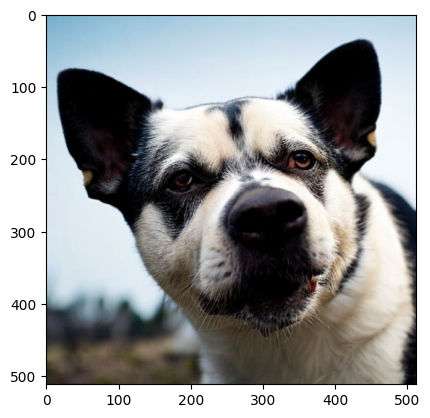

In [70]:
from diffusers import StableDiffusionPipeline, EulerDiscreteScheduler, DPMSolverMultistepScheduler, DEISMultistepScheduler
if True:
    model_id = "stabilityai/stable-diffusion-2-1-base"
    scheduler = DPMSolverMultistepScheduler.from_pretrained(model_id, subfolder="scheduler")
    pipe = StableDiffusionPipeline.from_pretrained(model_id, scheduler=scheduler, torch_dtype=torch.float16)
    pipe = pipe.to("cuda")
    pipe.set_progress_bar_config(disable=True)

#prompts = 'photo of a horse, far'
#neg = 'drawing, shiny, brown'
#prompts = 'photo of a bird, far'
#neg = 'drawing, shiny'
prompts = 'photo of a dog, far, side view'
neg = 'drawing, shiny'
#prompts = 'photo of a car'
#neg = 'drawing'

generator = torch.Generator(device="cuda").manual_seed(4046577738)
images = pipe(prompts, num_inference_steps=50, guidance_scale=7, negative_prompt=neg).images
for image in images:
    plt.imshow(image)
    plt.show()